<a href="https://colab.research.google.com/github/sharathchandra04/MLlearning/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

perceptron classification example


[[ 0.65549814 -0.609491  ]
 [-0.13410727  0.51839923]
 [-0.30428174 -0.95656478]
 ...
 [-0.75365474 -0.35015775]
 [-1.59836876  1.43369391]
 [ 0.20642639 -0.74183438]]
X_train.shape[1] -->  2
<class 'int'>
Accuracy: 0.975


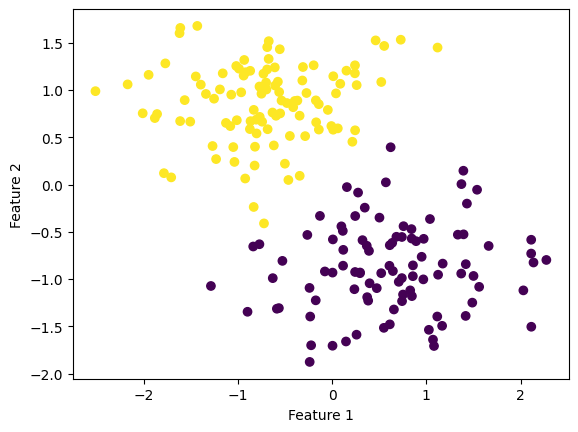

In [23]:
import numpy as np

# Build the Perceptron Model
class Perceptron:

    def __init__(self, num_inputs, learning_rate=0.01):
        print(type(num_inputs))
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate

    # Define the first linear layer
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0]
        return Z

    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z >= 0:
            return 1
        else:
            return 0

    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred

    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss

    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        # print('prediction -> ', prediction)
        error = self.loss(prediction, target)
        # ******************  imp  ****************
        # this is basically (inputs*error)/100 if learning rate is 0.01
        # this is basically (inputs*error)/1000 if learning rate is 0.001
        # to completely use the potential of the learning-rate which is 0.001 run the train algorithm 1000 times
        # ******************  imp  ****************
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error

    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the appropriate number of inputs
print(X_train)
print('X_train.shape[1] --> ', X_train.shape[1])
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


same using pyTorch


Epoch [1/10], weight:[[ 0.64295554 -0.49562797]], bias:[0.49008286] Loss: 100.0000
Epoch [2/10], weight:[[ 0.6178087 -0.5485019]], bias:[0.42108375] Loss: 69.0000
Epoch [3/10], weight:[[ 0.5950368  -0.58342975]], bias:[0.37208438] Loss: 49.0000
Epoch [4/10], weight:[[ 0.57561314 -0.60648113]], bias:[0.33608484] Loss: 36.0000
Epoch [5/10], weight:[[ 0.5559469 -0.6251957]], bias:[0.3080852] Loss: 28.0000
Epoch [6/10], weight:[[ 0.5360491 -0.6411448]], bias:[0.2860855] Loss: 22.0000
Epoch [7/10], weight:[[ 0.5192955  -0.65360844]], bias:[0.26608574] Loss: 20.0000
Epoch [8/10], weight:[[ 0.5040043 -0.664163 ]], bias:[0.24808595] Loss: 18.0000
Epoch [9/10], weight:[[ 0.48965412 -0.673306  ]], bias:[0.23208591] Loss: 16.0000
Epoch [10/10], weight:[[ 0.4753039 -0.682449 ]], bias:[0.21608588] Loss: 16.0000
Accuracy on Test Dataset: 0.9850000143051147


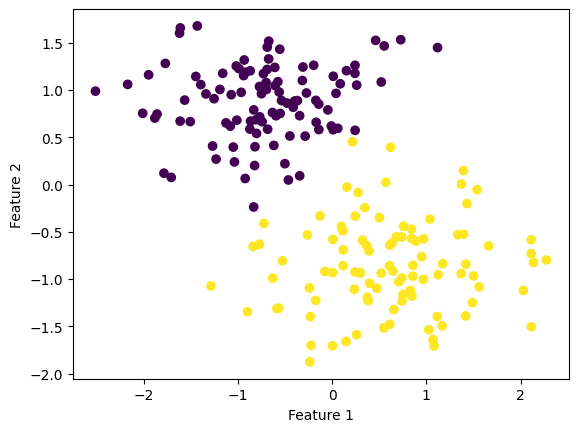

In [24]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)

    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >= 0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)

    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)


# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# loss function
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost


# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data
num_epochs = 10
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight & bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))

# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()